In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/"
mysuffix = "pool1_13_noddd_D11.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"

mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/"
mysuffix = "pool1_13_noddd_D30.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"

mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile)

donor_id,pool_id,time_point,treatment,celltype,n_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,CHem,5
HPSI0114i-bezi_3,pool10,D52,NONE,DA,66
HPSI0114i-bezi_3,pool10,D52,NONE,Epen1,39
HPSI0114i-bezi_3,pool10,D52,NONE,FPP,31
HPSI0114i-bezi_3,pool10,D52,NONE,P_FPP,4


In [3]:
######## ncells

In [4]:
## D11
df = myfile %>% group_by(celltype,time_point) %>% summarise(ncells = sum(n_cells))
# df = df[order(df$ncells),]
df[df$celltype %in% c("FPP","P_FPP"),]

celltype,time_point,ncells
FPP,D52,65718
P_FPP,D52,25131


In [5]:
## D30
df = myfile %>% group_by(celltype,time_point) %>% summarise(ncells = sum(n_cells))
# df = df[order(df$ncells),]
df[df$celltype %in% c("DA","Sert","Epen1","Astro"),]

celltype,time_point,ncells
Astro,D52,85451
DA,D52,79801
Epen1,D52,92147
Sert,D52,130209


In [6]:
## D52
df = myfile %>% group_by(celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
# df = df[order(df$ncells),]
df[df$celltype %in% c("DA","Sert","Epen1","Astro"),]

celltype,time_point,treatment,ncells
Astro,D52,NONE,44059
Astro,D52,ROT,41392
DA,D52,NONE,54331
DA,D52,ROT,25470
Epen1,D52,NONE,50084
Epen1,D52,ROT,42063
Sert,D52,NONE,74984
Sert,D52,ROT,55225


In [7]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
# col_Astro = "#d62728"
col_Astro = "#9467bd"

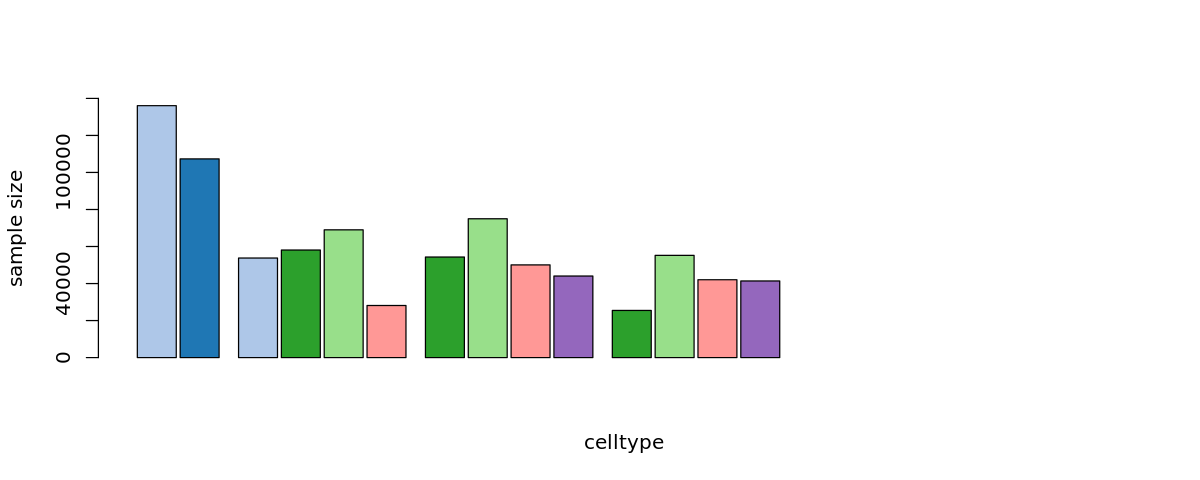

In [8]:
n = c(136074,107334,
     53774,58109,69007,28145,
     54331,74984,50084,44059,
     25470,55225,42063,41392)

options(repr.plot.width = 10, repr.plot.height = 4)

my.xlim = c(0, 140000)
my.ylim = c(0,25)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1,0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(n, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_FPP, col_DA, col_Sert, col_Epen1, 
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "sample size",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [ ]:
### cells split by donors

In [9]:
file_prefix = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
file_suffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_fractions_pivoted.tsv"

In [10]:
celltypes = read.table(paste0(file_prefix, file_suffix), header = T)
head(celltypes,2)

donor_id,pool_id,time_point,treatment,Astro,CHem,DA,Epen1,Epen2,FPP,P_FPP,P_Sert,Sert,unknown
HPSI0114i-bezi_3,pool10,D52,NONE,0.009174312,0.022935780,0.3027523,0.1788991,0,0.1422018,0.01834862,0.01376147,0.3119266,0
HPSI0114i-bezi_3,pool10,D52,ROT,0.022857143,0.005714286,0.2114286,0.2285714,0,0.1885714,0.00000000,0.01142857,0.3314286,0


In [11]:
D52_celltypes = celltypes %>% group_by(donor_id) %>% summarise(mean_neuro = mean(DA+Sert))

In [12]:
head(D52_celltypes[order(D52_celltypes$mean_neuro),])

donor_id,mean_neuro
HPSI0614i-paab_3,0.00000000
HPSI1113i-uofv_1,0.00000000
HPSI1014i-boss_1,0.01002865
HPSI0414i-mita_1,0.01188503
HPSI0114i-eipl_1,0.01278164
HPSI1014i-quls_2,0.01440541


In [13]:
bad_donors = D52_celltypes[D52_celltypes$mean_neuro < 0.2,"donor_id"]
nrow(bad_donors)

[1] 52

In [14]:
good_donors = D52_celltypes[D52_celltypes$mean_neuro > 0.75,"donor_id"]
nrow(good_donors)

[1] 47

In [15]:
# D11
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/"
mysuffix = "pool1_13_noddd_D11.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"
# D30
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/"
mysuffix = "pool1_13_noddd_D30.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"
# D52
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile)

donor_id,pool_id,time_point,treatment,celltype,n_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,CHem,5
HPSI0114i-bezi_3,pool10,D52,NONE,DA,66
HPSI0114i-bezi_3,pool10,D52,NONE,Epen1,39
HPSI0114i-bezi_3,pool10,D52,NONE,FPP,31
HPSI0114i-bezi_3,pool10,D52,NONE,P_FPP,4


In [16]:
## D11
df = myfile[myfile$donor_id %in% bad_donors$donor_id,] %>% 
    group_by(celltype,time_point) %>% summarise(ncells = sum(n_cells))
# df = df[order(df$ncells),]
df[df$celltype %in% c("FPP","P_FPP"),]

celltype,time_point,ncells
FPP,D52,28972
P_FPP,D52,17701


In [17]:
## D30
df = myfile[myfile$donor_id %in% bad_donors$donor_id,] %>% 
    group_by(celltype,time_point) %>% summarise(ncells = sum(n_cells))
# df = df[order(df$ncells),]
df[df$celltype %in% c("DA","Sert","Epen1","Astro"),]

celltype,time_point,ncells
Astro,D52,73083
DA,D52,8542
Epen1,D52,52929
Sert,D52,2391


In [18]:
## D52
df = myfile[myfile$donor_id %in% bad_donors$donor_id,] %>% 
    group_by(celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
# df = df[order(df$ncells),]
df[df$celltype %in% c("DA","Sert","Epen1","Astro"),]

celltype,time_point,treatment,ncells
Astro,D52,NONE,37437
Astro,D52,ROT,35646
DA,D52,NONE,5790
DA,D52,ROT,2752
Epen1,D52,NONE,27887
Epen1,D52,ROT,25042
Sert,D52,NONE,1410
Sert,D52,ROT,981


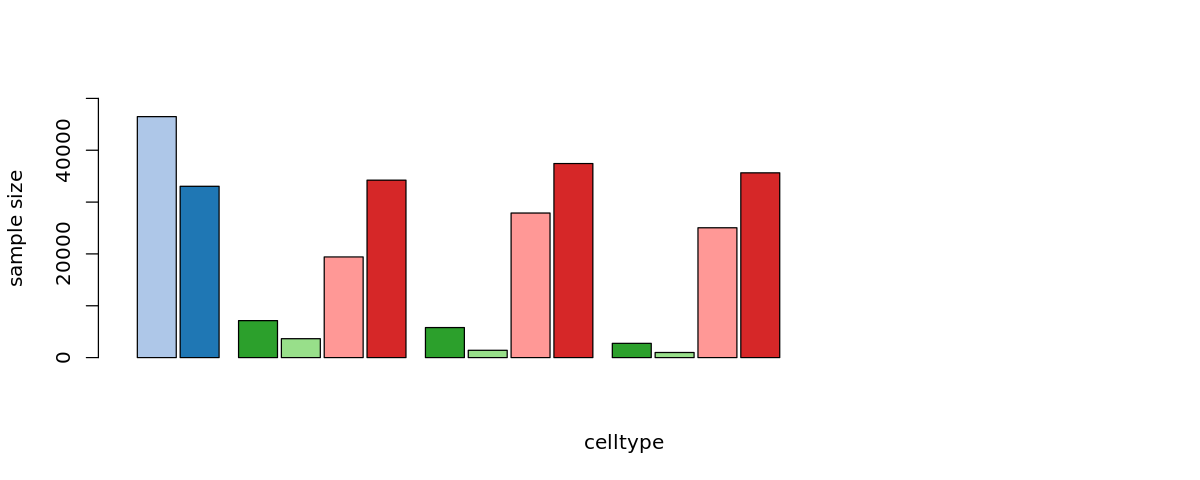

In [106]:
n = c(46484,33048,
      7136,3644,19420,34228,
      5790,1410,27887,37437,
      2752,981,25042,35646)

options(repr.plot.width = 10, repr.plot.height = 4)

my.xlim = c(0, 50000)
my.ylim = c(0,25)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1,0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(n, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "sample size",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [111]:
# D11
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/"
mysuffix = "pool1_13_noddd_D11.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"
# D30
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/"
mysuffix = "pool1_13_noddd_D30.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"
# D52
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile)

donor_id,pool_id,time_point,treatment,celltype,n_cells
<fct>,<fct>,<fct>,<fct>,<fct>,<int>
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,CHem,5
HPSI0114i-bezi_3,pool10,D52,NONE,DA,66
HPSI0114i-bezi_3,pool10,D52,NONE,Epen1,39
HPSI0114i-bezi_3,pool10,D52,NONE,FPP,31
HPSI0114i-bezi_3,pool10,D52,NONE,P_FPP,4


In [108]:
## D11
df = myfile[myfile$donor_id %in% good_donors$donor_id,] %>% 
    group_by(celltype,time_point) %>% summarise(ncells = sum(n_cells))
# df = df[order(df$ncells),]
df[df$celltype %in% c("FPP","P_FPP"),]

celltype,time_point,ncells
<fct>,<fct>,<int>
FPP,D11,22661
P_FPP,D11,19102


In [110]:
## D30
df = myfile[myfile$donor_id %in% good_donors$donor_id,] %>% 
    group_by(celltype,time_point) %>% summarise(ncells = sum(n_cells))
# df = df[order(df$ncells),]
df[df$celltype %in% c("DA","Sert","Epen1","Astro"),]

celltype,time_point,ncells
<fct>,<fct>,<int>
Astro,D30,4137
DA,D30,17526
Epen1,D30,1041
Sert,D30,23361


In [112]:
## D52
df = myfile[myfile$donor_id %in% good_donors$donor_id,] %>% 
    group_by(celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
# df = df[order(df$ncells),]
df[df$celltype %in% c("DA","Sert","Epen1","Astro"),]

celltype,time_point,treatment,ncells
<fct>,<fct>,<fct>,<int>
Astro,D52,NONE,760
Astro,D52,ROT,576
DA,D52,NONE,15557
DA,D52,ROT,6845
Epen1,D52,NONE,1715
Epen1,D52,ROT,1443
Sert,D52,NONE,37696
Sert,D52,ROT,27871


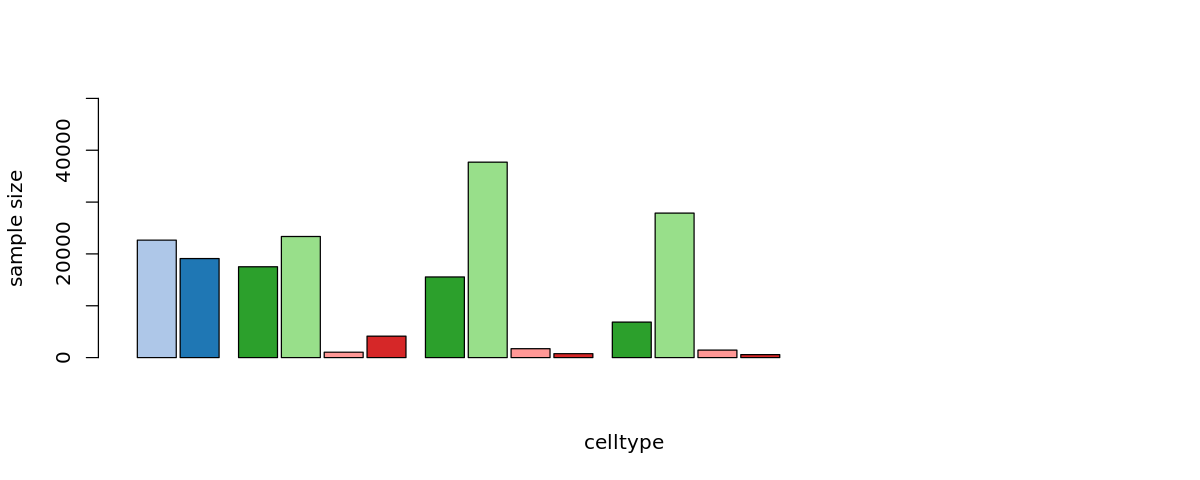

In [113]:
n = c(22661,19102,
      17526,23361,1041,4137,
      15557,37696,1715,760,
      6845,27871,1443,576)

options(repr.plot.width = 10, repr.plot.height = 4)

my.xlim = c(0, 50000)
my.ylim = c(0,25)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1,0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(n, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "sample size",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [ ]:
### number of donors

In [121]:
# D11
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/qtl_analysis/eqtl_discovery/celltype_FPP/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/qtl_analysis/eqtl_discovery/celltype_P_FPP/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))

[1] 173

[1] 172

In [123]:
# D30
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_DA/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_Sert/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_Epen1/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_Astro/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))

[1] 165

[1] 151

[1] 133

[1] 152

In [119]:
# D52 NONE
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_Sert/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_Epen1/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_Astro/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))

[1] 175

[1] 161

[1] 169

[1] 120

In [118]:
# D52 ROT
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_DA/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_Sert/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_Epen1/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_Astro/samplemapping.tsv"
nrow(read.csv(samplemapping, sep = "\t", header = F))

[1] 157

[1] 154

[1] 165

[1] 109

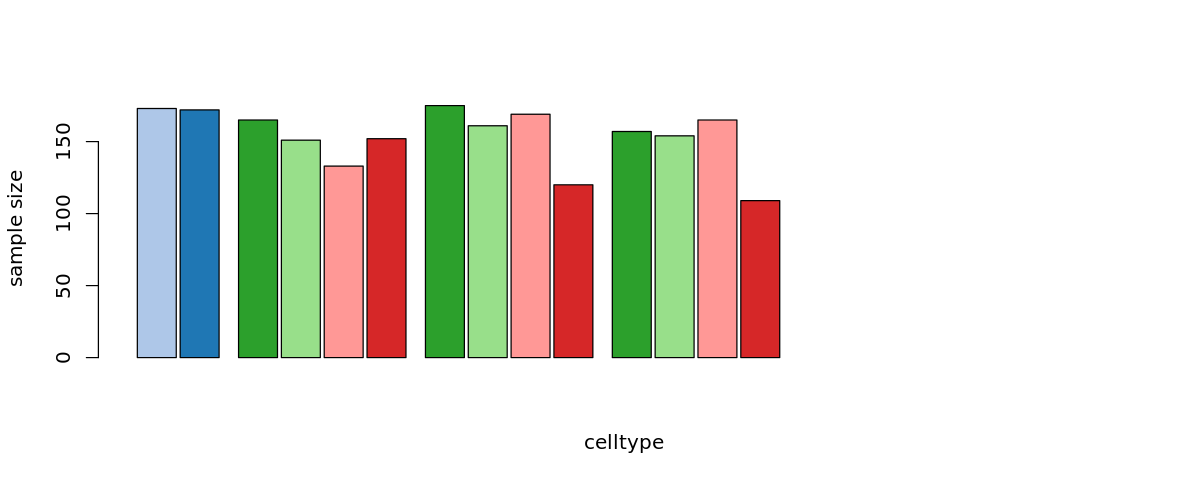

In [125]:
ndonors = c(173,172,            
      165,151,133,152,
      175,161,169,120,
      157,154,165,109)

options(repr.plot.width = 10, repr.plot.height = 4)

my.xlim = c(0, 180)
my.ylim = c(0,25)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1,0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(ndonors, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "sample size",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [164]:
# D11
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/"
mysuffix = "pool1_13_noddd_D11.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"
# D30
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/"
mysuffix = "pool1_13_noddd_D30.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"
# D52
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile)

donor_id,pool_id,time_point,treatment,celltype,n_cells
<fct>,<fct>,<fct>,<fct>,<fct>,<int>
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,CHem,5
HPSI0114i-bezi_3,pool10,D52,NONE,DA,66
HPSI0114i-bezi_3,pool10,D52,NONE,Epen1,39
HPSI0114i-bezi_3,pool10,D52,NONE,FPP,31
HPSI0114i-bezi_3,pool10,D52,NONE,P_FPP,4


In [160]:
## D11
# FPP
df = myfile %>% group_by(donor_id,celltype,time_point) %>% summarise(ncells = sum(n_cells))
donors = df[df$celltype == "FPP" & df$ncells > 100,"donor_id"]
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/qtl_analysis/eqtl_discovery/celltype_FPP/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])
# P_FPP
donors = df[df$celltype == "P_FPP" & df$ncells > 100,"donor_id"]
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/qtl_analysis/eqtl_discovery/celltype_P_FPP/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])

[1] 153

[1] 149

In [163]:
## D30
# DA
df = myfile %>% group_by(donor_id,celltype,time_point) %>% summarise(ncells = sum(n_cells))
donors = df[df$celltype == "DA" & df$ncells > 100,"donor_id"]
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_DA/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])
# Sert
df = myfile %>% group_by(donor_id,celltype,time_point) %>% summarise(ncells = sum(n_cells))
donors = df[df$celltype == "Sert" & df$ncells > 100,"donor_id"]
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_Sert/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])
# Epen1
df = myfile %>% group_by(donor_id,celltype,time_point) %>% summarise(ncells = sum(n_cells))
donors = df[df$celltype == "Epen1" & df$ncells > 100,"donor_id"]
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_Epen1/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])
# Astro
df = myfile %>% group_by(donor_id,celltype,time_point) %>% summarise(ncells = sum(n_cells))
donors = df[df$celltype == "Astro" & df$ncells > 100,"donor_id"]
samplemapping = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_Astro/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])

[1] 105

[1] 77

[1] 62

[1] 97

In [165]:
## D52 (NONE)
# DA
df = myfile %>% group_by(donor_id,celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
donors = df[df$treatment == "NONE" & df$celltype == "DA" & df$ncells > 100,"donor_id"]
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])
# Sert
df = myfile %>% group_by(donor_id,celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
donors = df[df$treatment == "NONE" & df$celltype == "Sert" & df$ncells > 100,"donor_id"]
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_Sert/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])
# Epen1
df = myfile %>% group_by(donor_id,celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
donors = df[df$treatment == "NONE" & df$celltype == "Epen1" & df$ncells > 100,"donor_id"]
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_Epen1/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])
# Astro
df = myfile %>% group_by(donor_id,celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
donors = df[df$treatment == "NONE" & df$celltype == "Astro" & df$ncells > 100,"donor_id"]
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_Astro/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])

[1] 109

[1] 93

[1] 94

[1] 41

In [166]:
## D52 (NONE)
# DA
df = myfile %>% group_by(donor_id,celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
donors = df[df$treatment == "ROT" & df$celltype == "DA" & df$ncells > 100,"donor_id"]
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_DA/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])
# Sert
df = myfile %>% group_by(donor_id,celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
donors = df[df$treatment == "ROT" & df$celltype == "Sert" & df$ncells > 100,"donor_id"]
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_Sert/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])
# Epen1
df = myfile %>% group_by(donor_id,celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
donors = df[df$treatment == "ROT" & df$celltype == "Epen1" & df$ncells > 100,"donor_id"]
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_Epen1/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])
# Astro
df = myfile %>% group_by(donor_id,celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))
donors = df[df$treatment == "ROT" & df$celltype == "Astro" & df$ncells > 100,"donor_id"]
samplemapping = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_Astro/samplemapping.tsv"
samplemapping = read.csv(samplemapping, sep = "\t", header = F)
nrow(samplemapping[samplemapping$V1 %in% donors$donor_id,])

[1] 65

[1] 77

[1] 81

[1] 40

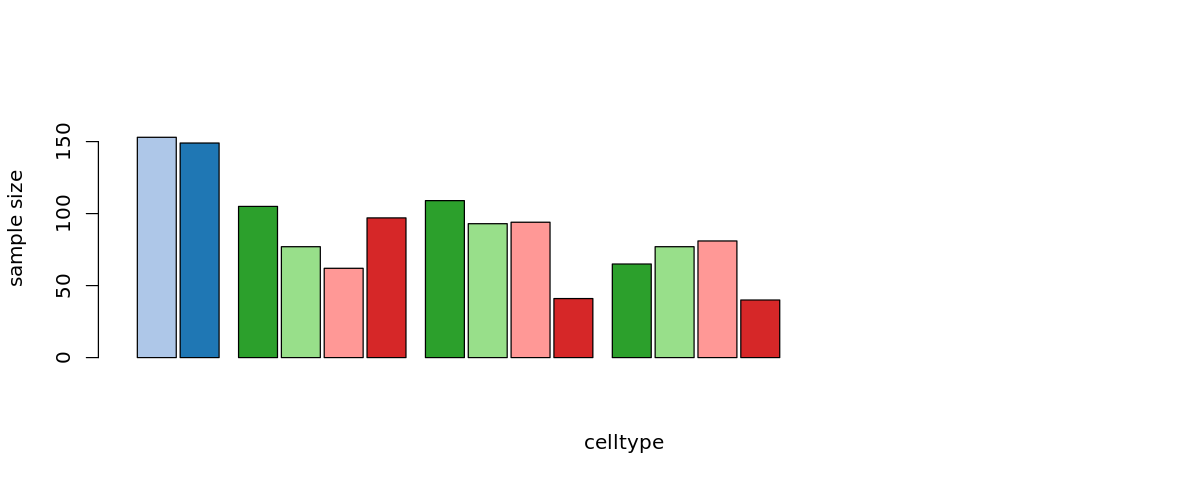

In [167]:
# > 100 cells
ndonors = c(153,149,            
      105,77,62,97,
      109,93,94,41,
      65,77,81,40)

options(repr.plot.width = 10, repr.plot.height = 4)

my.xlim = c(0, 180)
my.ylim = c(0,25)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1,0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(ndonors, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "sample size",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


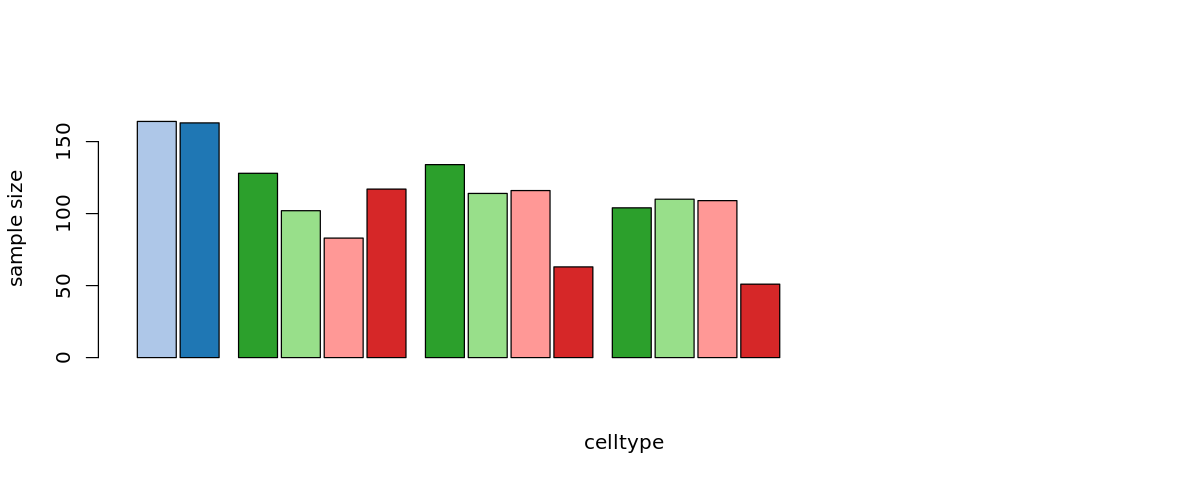

In [161]:
# > 50 cells
ndonors = c(164,163,            
      128,102,83,117,
      134,114,116,63,
      104,110,109,51)

options(repr.plot.width = 10, repr.plot.height = 4)

my.xlim = c(0, 180)
my.ylim = c(0,25)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1,0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(ndonors, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "sample size",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [1]:
ndonors = c(153,149,            
      97,105,77,62,
      109,93,94,41,
      65,77,81,40)

ndonors = c(173,172,            
      152,165,151,133,
      175,161,169,120,
      157,154,165,109)

eqtls <- c(1784,1802,
           674,546,622,618,
           698,778,745,111,
           303,611,575,87)

In [2]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"

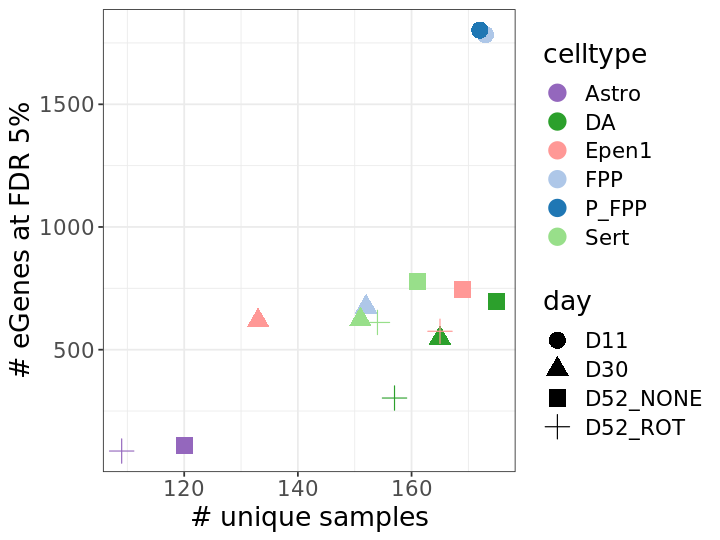

In [7]:
options(repr.plot.width = 6, repr.plot.height = 4.5)
df = data.frame(eff_sample_size = ndonors, power = eqtls, celltype = c("FPP","P_FPP",
                                                                      "FPP","DA","Sert","Epen1",
                                                                      "DA","Sert","Epen1","Astro",
                                                                      "DA","Sert","Epen1","Astro"),
                day = c("D11","D11","D30","D30","D30","D30","D52_NONE","D52_NONE","D52_NONE","D52_NONE",
                        "D52_ROT","D52_ROT","D52_ROT","D52_ROT"))
ggplot(df, aes(x = eff_sample_size, y = power, col = celltype, shape = day)) + geom_point(size = 4.5) +  
                                scale_color_manual(values=c(col_Astro, col_DA, col_Epen1,
                                                col_FPP, col_P_FPP, col_Sert)) + theme_bw() + 
                                xlab("# unique samples") + ylab("# eGenes at FDR 5%") + theme(text = element_text(size = 16))